In [2]:
import os
import pandas as pd

def load_housing_data():
    csv_path = os.path.join("Datensaetze", "housing.csv")
    return pd.read_csv(csv_path)

In [3]:
immobilien = load_housing_data()
immobilien.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
import numpy as np

#Funktion, um einen Testdatensatz aus einem Gesamtdatensatz zu lösen
#dabei wird sichergestellt, dass bei jedem Aufruf dieselben Testdaten erzeugt werden
#test_ratio = Größe des Testdatensatzes in Prozent der Gesamtdaten
def split_train_test(data,test_ratio):
    # stellt sicher, dass np.random bei jedem Aufruf dieselben Zahlen erzeugt
    np.random.seed(14)
    
    # len(array) gibt die Anzahl der Zeilen eines Arrays zurück
    shuffled_indices = np.random.permutation(len(data))
    
    # errechnet die absolute Anzahl der Testdatensätze
    test_set_size = int(len(data) * test_ratio)
    
    test_indices = shuffled_indices[:test_set_size]  # ...BIS zur Anzahl der Testdatensätze
    train_indices = shuffled_indices[test_set_size:] # ...AB der Anzahl der Testdatensätze
    
    # iloc kommt aus pandas, gibt Datensätze an den benannten Indizes aus - erstellt also die 2 getrennten Datensätze
    return data.iloc[train_indices], data.iloc[test_indices]

train_set, test_set = split_train_test(immobilien, 0.2)
print(len(train_set), "Trainingsdatensätze +", len(test_set), "Testdatensätze")
train_set.head()

16512 Trainingsdatensätze + 4128 Testdatensätze


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
6965,-118.06,33.99,46.0,1203.0,219.0,637.0,211.0,3.3611,174400.0,<1H OCEAN
7969,-118.19,33.87,42.0,1213.0,269.0,628.0,229.0,3.6987,152100.0,<1H OCEAN
19285,-122.75,38.43,36.0,1599.0,345.0,1086.0,314.0,2.6667,149100.0,<1H OCEAN
3262,-122.90,39.17,45.0,1314.0,277.0,649.0,232.0,2.5750,73600.0,INLAND
1473,-122.03,37.97,45.0,1613.0,338.0,865.0,336.0,3.2500,151100.0,NEAR BAY


In [5]:
immobilien.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [6]:
immobilien.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


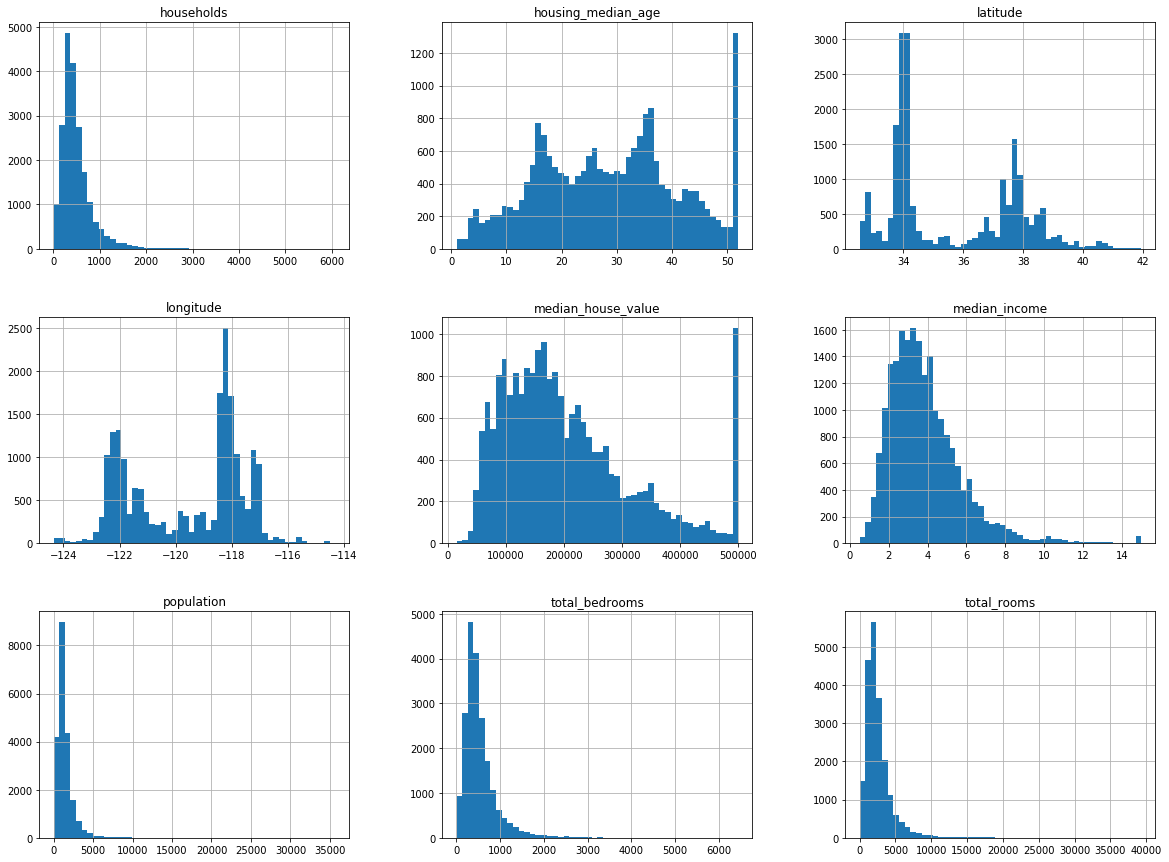

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
immobilien.hist(bins=50, figsize=(20,15))
plt.show()

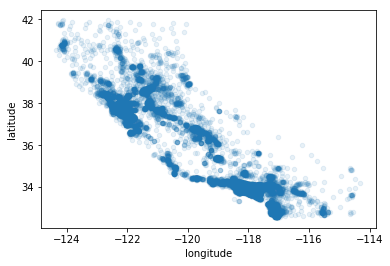

In [7]:
immobilien.plot(kind="scatter",x="longitude",y="latitude", alpha=0.1)